In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

/home/yanndrade/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/yanndrade/.local/lib/python3.10/site-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
df = yf.download("BTC-USD", start='2013-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-04-13,67188.375000,67931.429688,60919.105469,63821.472656,63821.472656,52869738185
2024-04-14,63836.230469,65824.429688,62205.851562,65738.726562,65738.726562,49084320047
2024-04-15,65739.648438,66878.648438,62332.070312,63426.210938,63426.210938,43595917654


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3501 entries, 2014-09-17 to 2024-04-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3501 non-null   float64
 1   High       3501 non-null   float64
 2   Low        3501 non-null   float64
 3   Close      3501 non-null   float64
 4   Adj Close  3501 non-null   float64
 5   Volume     3501 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 191.5 KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3501.000000,3501.000000,3501.000000,3501.000000,3501.000000,3.501000e+03
mean,15836.057483,16206.612544,15439.594173,15852.095894,15852.095894,1.710931e+10
std,17555.645185,17977.684548,17087.851354,17567.831046,17567.831046,1.928779e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,1006.210022,1033.869995,982.830017,1007.479980,1007.479980,2.079820e+08
50%,8661.760742,8836.190430,8394.459961,8660.700195,8660.700195,1.275080e+10
75%,26737.578125,27092.697266,26339.314453,26754.281250,26754.281250,2.759567e+10
max,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,3.509679e+11


In [6]:
df[df["Close"]>= 73083]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-13,71482.117188,73637.476562,71334.09375,73083.5,73083.5,48212536929


In [7]:
df.to_csv('btc.csv')

# Multiple Stocks

In [8]:
acoes = ['GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']

In [9]:
df_stocks = pd.DataFrame()
for acao in acoes:
    df_stocks[acao] = yf.download(acao, start='2015-01-01')["Close"]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [10]:
df_stocks

,GOLL4.SA,CVCB3.SA,WEGE3.SA,MGLU3.SA,TOTS3.SA,BOVA11.SA
Date,,,,,,
2015-01-02,14.99,12.527681,5.923076,0.217754,11.881510,47.259998
2015-01-05,14.85,12.362843,5.963461,0.221847,11.516435,46.320000
2015-01-06,15.21,12.198006,5.875000,0.218924,10.796243,46.580002
2015-01-07,14.55,12.090861,5.807692,0.226231,10.719909,48.150002
2015-01-08,14.27,11.662282,5.905769,0.224477,10.968824,48.509998
...,...,...,...,...,...,...
2024-04-11,1.49,2.360000,38.240002,1.730000,27.469999,123.720001
2024-04-12,1.44,2.240000,37.980000,1.660000,27.379999,122.120003
2024-04-15,1.39,2.030000,37.639999,1.530000,26.900000,121.550003


In [11]:
df_stocks.describe()

,GOLL4.SA,CVCB3.SA,WEGE3.SA,MGLU3.SA,TOTS3.SA,BOVA11.SA
count,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2283.000000
mean,14.154481,20.656675,19.752914,5.804032,19.452716,86.341419
std,9.176041,14.088474,13.540574,6.752992,9.601612,25.167342
min,1.160000,1.900000,4.942307,0.028607,7.138862,36.450001
25%,7.402500,10.758390,7.207692,0.837534,10.251951,62.545000
50%,11.485000,16.848715,11.527500,3.173231,16.474523,92.879997
75%,19.959999,33.082970,34.384999,7.279081,28.500000,107.820000
max,43.790001,53.407486,46.105000,25.674625,40.500488,130.389999


In [12]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2310 entries, 2015-01-02 to 2024-04-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GOLL4.SA   2310 non-null   float64
 1   CVCB3.SA   2310 non-null   float64
 2   WEGE3.SA   2310 non-null   float64
 3   MGLU3.SA   2310 non-null   float64
 4   TOTS3.SA   2310 non-null   float64
 5   BOVA11.SA  2283 non-null   float64
dtypes: float64(6)
memory usage: 126.3 KB


<Axes: xlabel='MGLU3.SA', ylabel='Count'>

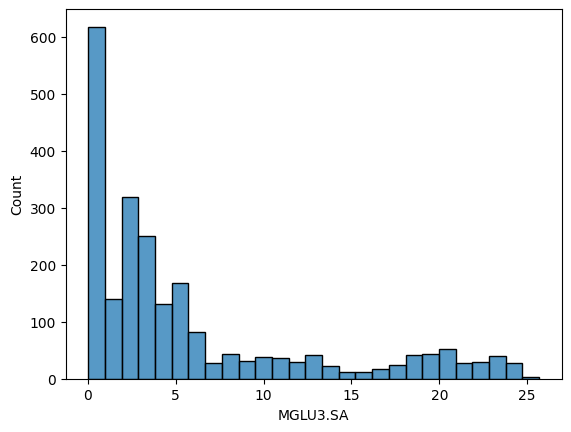

In [14]:
sns.histplot(df_stocks["MGLU3.SA"])